In [1]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

# 클래스 이름 줄이기
class_names = [x.split('.')[-1] if 'misc' not in x else '.'.join(x.split('.')[-2:]) for x in newsgroups_train.target_names]

print(class_names)

class_names[3] = 'pc.hardware'
class_names[4] = 'mac.hardware'

print(class_names)

['atheism', 'graphics', 'ms-windows.misc', 'hardware', 'hardware', 'x', 'misc.forsale', 'autos', 'motorcycles', 'baseball', 'hockey', 'crypt', 'electronics', 'med', 'space', 'christian', 'guns', 'mideast', 'politics.misc', 'religion.misc']
['atheism', 'graphics', 'ms-windows.misc', 'pc.hardware', 'mac.hardware', 'x', 'misc.forsale', 'autos', 'motorcycles', 'baseball', 'hockey', 'crypt', 'electronics', 'med', 'space', 'christian', 'guns', 'mideast', 'politics.misc', 'religion.misc']


In [2]:
import sklearn
import sklearn.metrics
from sklearn.naive_bayes import MultinomialNB

# TF-IDF를 사용해서 문서를 숫자 벡터로 변환하는 전처리 과정
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False)
train_vectors = vectorizer.fit_transform(newsgroups_train.data)
test_vectors = vectorizer.transform(newsgroups_test.data)

# 학습하기
nb = MultinomialNB(alpha=.01)
nb.fit(train_vectors, newsgroups_train.target)

# 테스트 하기
pred = nb.predict(test_vectors)
sklearn.metrics.f1_score(newsgroups_test.target, pred, average='weighted')

0.8350184193998174

In [3]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(vectorizer, nb)

predict_classes = pipe.predict_proba([newsgroups_test.data[0]]).round(3)[0]

print(predict_classes)

[0.001 0.01  0.003 0.047 0.006 0.002 0.003 0.521 0.022 0.008 0.025 0.
 0.331 0.003 0.006 0.    0.003 0.    0.001 0.009]


In [4]:
rank = sorted(range(len(predict_classes)), 
              key=lambda i: predict_classes[i], 
              reverse=True)
for rank_index in rank:
    print('[{:>5}]\t{:<3}\tclass ({:.1%})'.format(rank.index(rank_index) + 1, rank_index, predict_classes[rank_index]))

[    1]	7  	class (52.1%)
[    2]	12 	class (33.1%)
[    3]	3  	class (4.7%)
[    4]	10 	class (2.5%)
[    5]	8  	class (2.2%)
[    6]	1  	class (1.0%)
[    7]	19 	class (0.9%)
[    8]	9  	class (0.8%)
[    9]	4  	class (0.6%)
[   10]	14 	class (0.6%)
[   11]	2  	class (0.3%)
[   12]	6  	class (0.3%)
[   13]	13 	class (0.3%)
[   14]	16 	class (0.3%)
[   15]	5  	class (0.2%)
[   16]	0  	class (0.1%)
[   17]	18 	class (0.1%)
[   18]	11 	class (0.0%)
[   19]	15 	class (0.0%)
[   20]	17 	class (0.0%)


In [5]:
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=class_names)

In [6]:
exp = explainer.explain_instance(newsgroups_test.data[0], 
                                 pipe.predict_proba, 
                                 top_labels=1)

exp.available_labels()

/usr/local/lib/python3.6/dist-packages/lime/lime_text.py:114: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]


[7]

In [7]:
exp.show_in_notebook(text=newsgroups_test.data[0])

In [8]:
from lime.lime_text import LimeTextExplainer

idx = 5

explainer = LimeTextExplainer(class_names=class_names)
exp = explainer.explain_instance(newsgroups_test.data[idx], pipe.predict_proba, top_labels=1)

predict_classes = pipe.predict_proba([newsgroups_test.data[idx]]).round(3)[0]
rank = sorted(range(len(predict_classes)), 
              key=lambda i:predict_classes[i], 
              reverse=True)

print('Document id: %d' % idx)
print('Predicted class: %s' % class_names[nb.predict(test_vectors[idx]).reshape(1, -1)[0, 0]])
print('True class: %s' % class_names[newsgroups_test.target[idx]])
print(predict_classes)
print(rank)

print('Explanation for class %s' % class_names[rank[0]])
print('\n'.join(map(str, exp.as_list(rank[0]))))

exp.show_in_notebook(text=newsgroups_test.data[idx])

/usr/local/lib/python3.6/dist-packages/lime/lime_text.py:114: FutureWarning: split() requires a non-empty pattern match.
  self.as_list = [s for s in splitter.split(self.raw) if s]


Document id: 5
Predicted class: med
True class: med
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[13, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19]
Explanation for class med
('fungus', 0.0018551477616916066)
('candida', 0.0017423718081271886)
('Candida', 0.0016672230117892306)
('yeast', 0.0016345009839533857)
('Yeast', 0.0015954882065684678)
('systemic', 0.0015285609578536)
('blooms', 0.0015267001171120308)
('ocom', 0.0014570590704801024)
('Med', 0.0014315818354780848)
('enlightened', 9.886030071852004e-05)


# LIME for Image

### scikit-image 패키지를 사용해서 올리베티 얼굴 데이터를 로드하고 확인하는 코드

(-0.5, 1279.5, 1279.5, -0.5)

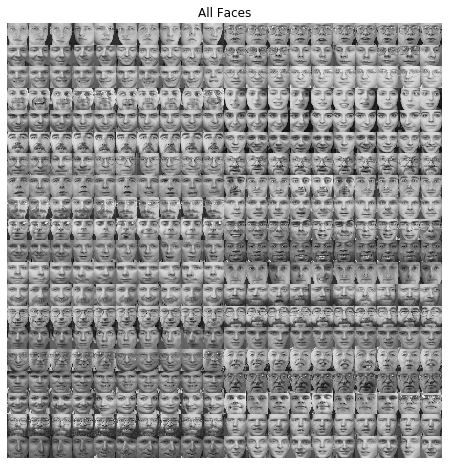

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import gray2rgb, rgb2gray
from skimage.util import montage

from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

# 이미지를 흑백으로 만들고 LIME이 처리할 수 있는 형태로 변환하기
X_vec = np.stack([gray2rgb(iimg) for iimg in faces.data.reshape((-1, 64, 64))], 0)
y_vec = faces.target.astype(np.uint8)

%matplotlib inline
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))
ax1.imshow(montage(X_vec[:, :, :, 0]), 
           cmap='gray', 
           interpolation='none')
ax1.set_title('All Faces')
ax1.axis('off')


### 이미지 한장을 그리는 코드

(-0.5, 63.5, 63.5, -0.5)

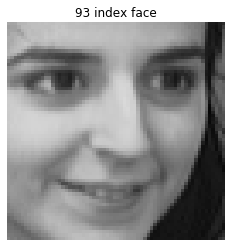

In [10]:
index = 93
plt.imshow(X_vec[index], cmap='gray')
plt.title('{} index face'.format(index))
plt.axis('off')

## 학습하기

sklearn 패키지에 있는 train_test_split 함수를 사용하여 X_vec과 y_vec으로부터 학습용과 테스트용 데이터셋을 분리하는 코드

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vec, 
                                                    y_vec, 
                                                    train_size=0.70)

### MLP가 학습할 수 있게 이미지 전처리를 수행하는 파이프라인 생성

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

class PipeStep(object):
    """
        Wrapper for tuning functions into pipeline transforms (no-fitting)
    """
    def __init__(self, step_func):
        self._step_func = step_func
        
    def fit(self, *args):
        return self
    def transform(self, X):
        return self._step_func(X)
    
makegray_step = PipeStep(lambda img_list: [rgb2gray(img) for img in img_list])
flatten_step = PipeStep(lambda img_list: [img.ravel() for img in img_list])

simple_pipeline = Pipeline([
    ('Make Gray', makegray_step), 
    ('Flatten Image', flatten_step), 
    ('MLP', MLPClassifier(activation='relu', 
                          hidden_layer_sizes=(400, 40), 
                          random_state=1))
    ])

### 학습 데이터를 MLP가 있는 파이프라인에 입력하는 코드

In [13]:
simple_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(steps=[('Make Gray', <__main__.PipeStep object at 0x7f07bc1930f0>),
                ('Flatten Image', <__main__.PipeStep object at 0x7f07bc193128>),
                ('MLP',
                 MLPClassifier(hidden_layer_sizes=(400, 40), random_state=1))])

### classification_report를 사용해서 모델 성능을 테스트하는 코드

In [14]:
pipe_pred_test = simple_pipeline.predict(X_test)
pipe_pred_prop = simple_pipeline.predict_proba(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, 
                            y_pred=pipe_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         1
           3       0.50      0.33      0.40         3
           4       0.00      0.00      0.00         3
           5       0.67      1.00      0.80         2
           7       1.00      0.75      0.86         4
           8       1.00      0.67      0.80         3
           9       0.67      0.67      0.67         3
          10       1.00      1.00      1.00         2
          11       1.00      0.60      0.75         5
          12       0.43      0.75      0.55         4
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         3
          15       1.00      0.60      0.75         5
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         3
          18       1.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Normalizer 전처리 과정을 추가해서 MLP를 학습시키는 코드

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.neural_network import MLPClassifier

class PipeStep(object):
    """
        Wrapper for tuning functions into pipeline transforms (no-fitting)
    """
    def __init__(self, step_func):
        self._step_func = step_func
        
    def fit(self, *args):
        return self
    
    def transform(self, X):
        return self._step_func(X)
    
makegray_step = PipeStep(lambda img_list: [rgb2gray(img) for img in img_list])
flatten_step = PipeStep(lambda img_list: [img.ravel() for img in img_list])

simple_pipeline = Pipeline([
    ('Make Gray', makegray_step),
    ('Flatten Image', flatten_step),
    ('Normalize', Normalizer()), # 전처리 과정에 노멀라이저 추가
    ('MLP', MLPClassifier(activation='relu', 
                          hidden_layer_sizes=(400, 40), 
                          random_state=1))
    ])

simple_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(steps=[('Make Gray', <__main__.PipeStep object at 0x7f07bc133b70>),
                ('Flatten Image', <__main__.PipeStep object at 0x7f07bc133ba8>),
                ('Normalize', Normalizer()),
                ('MLP',
                 MLPClassifier(hidden_layer_sizes=(400, 40), random_state=1))])

### 정규화 추가 후 재학습 결과 확인

In [16]:
pipe_pred_test = simple_pipeline.predict(X_test)
pipe_pred_prop = simple_pipeline.predict_proba(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, 
                            y_pred=pipe_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         1
           3       1.00      0.67      0.80         3
           4       0.50      0.33      0.40         3
           5       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         4
           8       0.50      1.00      0.67         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         2
          11       1.00      0.80      0.89         5
          12       0.43      0.75      0.55         4
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         3
          15       0.43      0.60      0.50         5
          16       0.67      1.00      0.80         2
          17       1.00      1.00      1.00         3
          18       0.50    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 파라미터 수정하기

In [17]:
simple_pipeline = Pipeline([
    ('Make Gray', makegray_step),
    ('Flatten Image', flatten_step),
    ('Normalize', Normalizer()),
    ('MLP', MLPClassifier(
        activation='relu',
        alpha=1e-7,
        epsilon=1e-6,
        hidden_layer_sizes=(800, 120),
        random_state=1))    
])

simple_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(steps=[('Make Gray', <__main__.PipeStep object at 0x7f07bc133b70>),
                ('Flatten Image', <__main__.PipeStep object at 0x7f07bc133ba8>),
                ('Normalize', Normalizer()),
                ('MLP',
                 MLPClassifier(alpha=1e-07, epsilon=1e-06,
                               hidden_layer_sizes=(800, 120),
                               random_state=1))])

In [18]:
pipe_pred_test = simple_pipeline.predict(X_test)
pipe_pred_prop = simple_pipeline.predict_proba(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, 
                            y_pred=pipe_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         2
           2       0.50      1.00      0.67         1
           3       1.00      0.67      0.80         3
           4       1.00      0.33      0.50         3
           5       0.67      1.00      0.80         2
           6       0.00      0.00      0.00         0
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       0.50      1.00      0.67         2
          11       1.00      1.00      1.00         5
          12       1.00      0.75      0.86         4
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         3
          15       1.00      0.60      0.75         5
          16       1.00      1.00      1.00         2
          17       1.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### LIME의 이미지 설명체와 이미지 분할 알고리즘을 선언하는 코드

In [19]:
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm

exaplainer = lime_image.LimeImageExplainer()

# 이미지 분할 알고리즘: quickshift(기본), slic, felzenszwalb
segmenter = SegmentationAlgorithm('slic', 
                                  n_segments=100, 
                                  compactness=1, 
                                  sigma=1)

### 테스트 0번 이미지에 대해 설명 모델을 구축하는 코드

In [41]:
%%time

olivetti_test_index = 0
print(np.float64(X_test[olivetti_test_index]))

exp = explainer.explain_instance(np.float64(X_test[olivetti_test_index]), 
                                 top_labels=6, 
                                 num_samples=10000, 
                                #  segmentation_fn=segmenter,
                                 classifier_fn=simple_pipeline.predict_proba,
                                 ) 

[[[0.48347107 0.48347107 0.48347107]
  [0.52066118 0.52066118 0.52066118]
  [0.59090906 0.59090906 0.59090906]
  ...
  [0.42561984 0.42561984 0.42561984]
  [0.3429752  0.3429752  0.3429752 ]
  [0.33057851 0.33057851 0.33057851]]

 [[0.48760331 0.48760331 0.48760331]
  [0.53305787 0.53305787 0.53305787]
  [0.60743803 0.60743803 0.60743803]
  ...
  [0.44628099 0.44628099 0.44628099]
  [0.37190083 0.37190083 0.37190083]
  [0.35537189 0.35537189 0.35537189]]

 [[0.49173555 0.49173555 0.49173555]
  [0.55785125 0.55785125 0.55785125]
  [0.60330576 0.60330576 0.60330576]
  ...
  [0.45454547 0.45454547 0.45454547]
  [0.38429752 0.38429752 0.38429752]
  [0.38429752 0.38429752 0.38429752]]

 ...

 [[0.0785124  0.0785124  0.0785124 ]
  [0.10330579 0.10330579 0.10330579]
  [0.10743801 0.10743801 0.10743801]
  ...
  [0.1322314  0.1322314  0.1322314 ]
  [0.14049587 0.14049587 0.14049587]
  [0.07438017 0.07438017 0.07438017]]

 [[0.13636364 0.13636364 0.13636364]
  [0.0785124  0.0785124  0.0785124 ]


TypeError: cannot use a string pattern on a bytes-like object

## 실습#5: 보스턴 주택 가격 결정 요소 구하기
### SHAP 모듈로부터 보스턴 데이터셋을 불러와서 학습용과 테스트용 데이터셋으로 분리하는 코드

In [4]:
import shap
from sklearn.model_selection import train_test_split

X, y = shap.datasets.boston()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=1)
X_train[:10]

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
42,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
424,8.79212,0.0,18.10,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16
160,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50
185,0.06047,0.0,2.46,0.0,0.488,6.153,68.8,3.2797,3.0,193.0,17.8,387.11,13.15
101,0.11432,0.0,8.56,0.0,0.520,6.781,71.3,2.8561,5.0,384.0,20.9,395.58,7.67
268,0.54050,20.0,3.97,0.0,0.575,7.470,52.6,2.8720,5.0,264.0,13.0,390.30,3.16
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04


### 방의 개수와 집값 간의 관계를 산점도로 그리는 코드

Text(0, 0.5, 'MEDV \n Price $1,000')

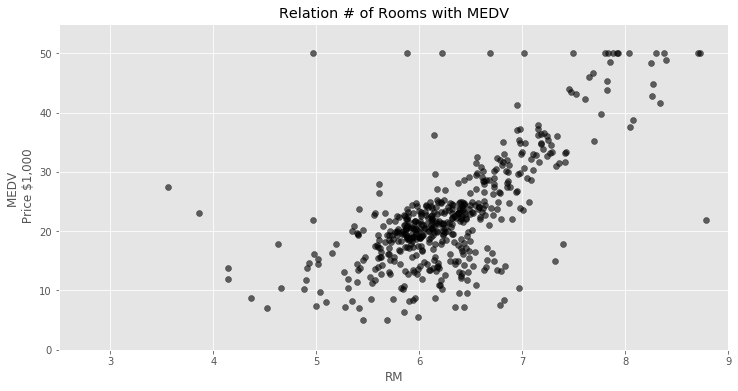

In [5]:
# 산점도 출력 코드
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))

ax1.scatter(X['RM'], y, color='black', alpha=0.6)

ax1.set_title('Relation # of Rooms with MEDV')
ax1.set_xlim(2.5, 9)
ax1.set_xlabel('RM')
ax1.set_ylim(0, 55)
ax1.set_ylabel('MEDV \n Price $1,000')

### 선형 모델을 이용해서 방 개수와 주택 가격 간의 관계를 구하는 코드

In [6]:
from sklearn import linear_model
import pandas as pd

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(X_train['RM']), y=y_train)
prediction = linear_regression.predict(X=pd.DataFrame(X_test['RM']))

print('a value: ', linear_regression.intercept_)
print('b value: ', linear_regression.coef_)
print('MEDV = {:.2f} * RM {:.2f}'.format(linear_regression.coef_[0], linear_regression.intercept_))

a value:  -32.39552264560753
b value:  [8.76050748]
MEDV = 8.76 * RM -32.40


### 방의 개수가 달라질 때 주택 매매 가격을 예측하는 그래프와 데이터를 한꺼번에 플롯으로 그리는 코드

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


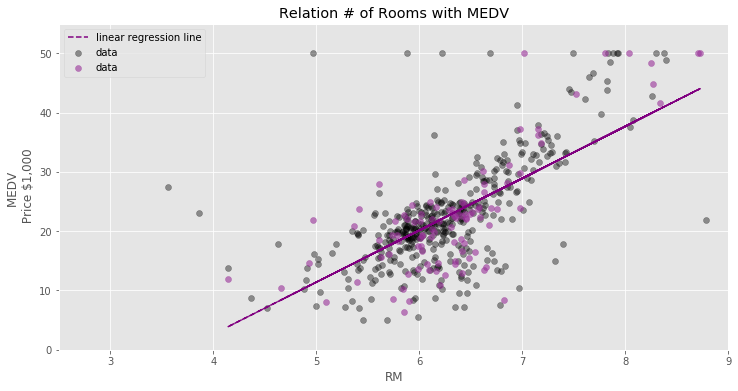

In [8]:
# 학습, 테스트 데이터를 산점도로 그리고 직선의 방정식을 표시하는 코드
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
ax1.scatter(X_train['RM'], y_train, color='black', alpha=0.4, label='data')
ax1.scatter(X_test['RM'], y_test, color='#993299', alpha=0.6, label='data')
ax1.set_title('Relation # of Rooms with MEDV')
ax1.set_xlim(2.5, 9)
ax1.set_xlabel('RM')
ax1.set_ylim(0, 55)
ax1.set_ylabel('MEDV \n Price $1,000')

ax1.plot(X_test['RM'], prediction, color='purple', alpha=1, linestyle='--', label='linear regression line')
ax1.legend()

### 모델 예측치와 실제 집값 간의 RMSE를 구하는 코드

In [10]:
import numpy as np
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, prediction, squared=False))

print("RMSE: %f" % (rmse))

RMSE: 2.526487


### xgboost의 선형 회귀 모델로 주택 매매 가격을 예측하는 모델을 만들고 학습하는 코드

In [11]:
import xgboost

# XGBoost 모델 학습하기
model = xgboost.XGBRegressor(objective='reg:linear')
model.fit(X_train, y_train)

preds = model.predict(X_test)

AttributeError: module 'xgboost' has no attribute 'XGRegressor'